In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datafile = 'data\ex1data1.txt'

In [3]:
#由于需要进行矩阵运算，需保证输入的数据为二维数组
data_matrix = np.loadtxt(datafile, delimiter=",")
X = np.array(data_matrix[:,:1])
y = np.array(data_matrix[:,1:])
X = np.insert(X, 0, 1, axis = 1)
m = y.size

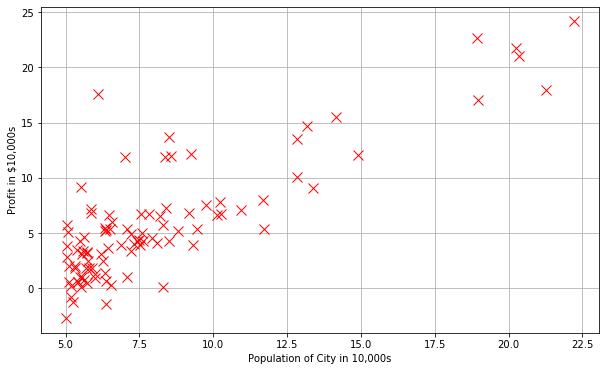

In [32]:
#画出训练集的图像
plt.figure(figsize=(10,6))
plt.plot(X[:,1], y, 'rx', markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.grid(True)

In [5]:
#假设函数：h(x) = theta0+theta1*x
def h(theta, X):
    return np.dot(X, theta)

#损失函数
def cost(theta, X, y):
    return float(1./(2*m)*np.dot((h(theta,X)-y).T, h(theta,X)-y))

In [6]:
#测试 h(x) = 0 时的损失
theta_test = np.zeros((2,1))
cost(theta_test, X, y)

32.07273387745567

In [7]:
iterations = 2000
alpha = 0.01  #学习率

In [8]:
#梯度下降法
def gradient_descent(theta, X, y):
    cost_log = []
    theta_log = []
    for i in range(iterations):
        cost_log.append(cost(theta,X,y))
        theta_log.append(list(theta[:,0]))
        d_cost = 1./m*np.dot(X.T, h(theta,X)-y)
        theta -= alpha*d_cost
    return theta_log, cost_log

In [9]:
theta = np.array([[0.],[1.]])

# 运行梯度下降算法，并得出最终的theta
theta_log, cost_log = gradient_descent(theta, X, y)
theta

array([[-3.79076326],
       [ 1.18248349]])

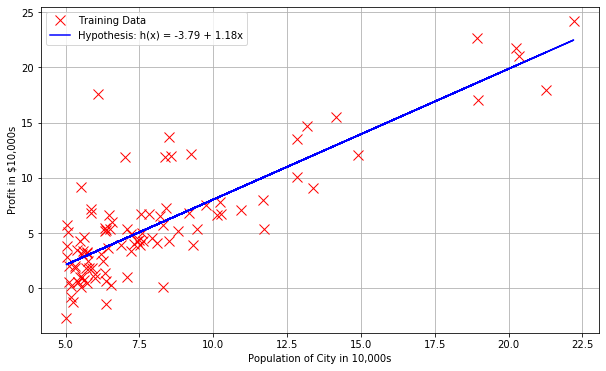

In [10]:
#画出得到的假设函数
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y,'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],theta[0]+theta[1]*X[:,1],'b-',label = 'Hypothesis: h(x) = {:.2f} + {:.2f}x'.format(float(theta[0]),float(theta[1])))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.grid(True)
plt.legend()

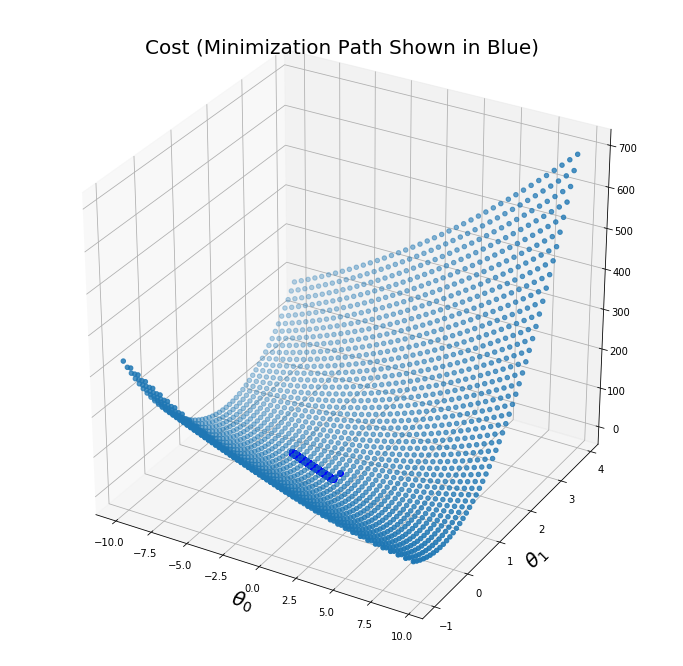

In [31]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
xx, yy, zz = [], [], []
for i in xvals:
    for j in yvals:
        xx.append(i)
        yy.append(j)
        zz.append(cost(np.array([[i], [j]]),X,y))

ax.scatter(xx,yy,zz)

plt.xlabel(r'$\theta_0$',fontsize=20)
plt.ylabel(r'$\theta_1$',fontsize=20)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=20)
plt.plot([x[0] for x in theta_log],[x[1] for x in theta_log],cost_log,'bo-')